In [ ]:
!pip install perfplot

     |████████████████████████████████| 214 kB 6.1 MB/s 
     |████████████████████████████████| 15.7 MB 51.7 MB/s 
     |████████████████████████████████| 51 kB 4.8 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# Metaheuristics for solving TSP

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from operator import itemgetter
import random
import itertools

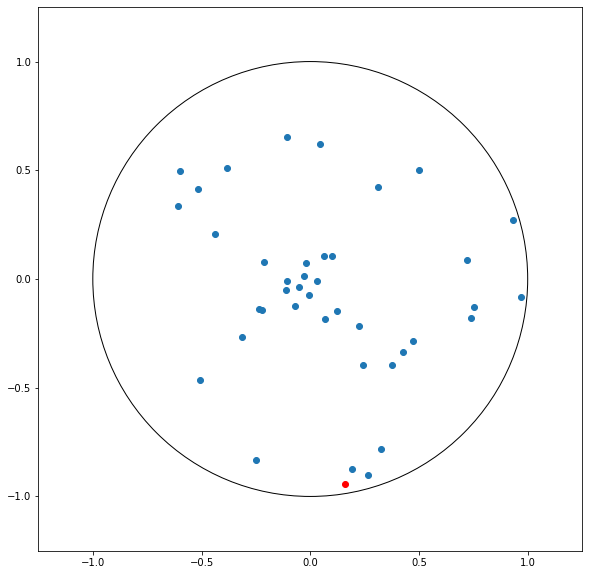

Random Restart Hill Climbing:


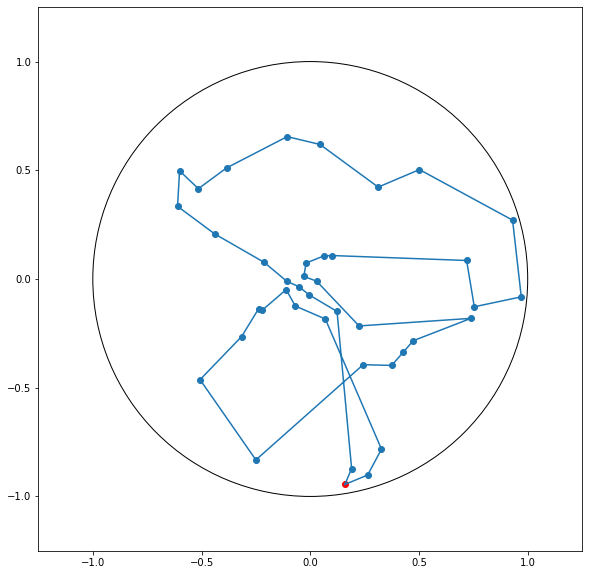

([0, 15, 9, 5, 1, 35, 10, 3, 11, 18, 25, 6, 40, 20, 32, 19, 38, 21, 2, 13, 30, 36, 22, 33, 26, 7, 24, 37, 8, 4, 39, 23, 16, 29, 14, 12, 17, 31, 27, 28, 34, 0], 9.488606575132556)
Simulated Annealing:


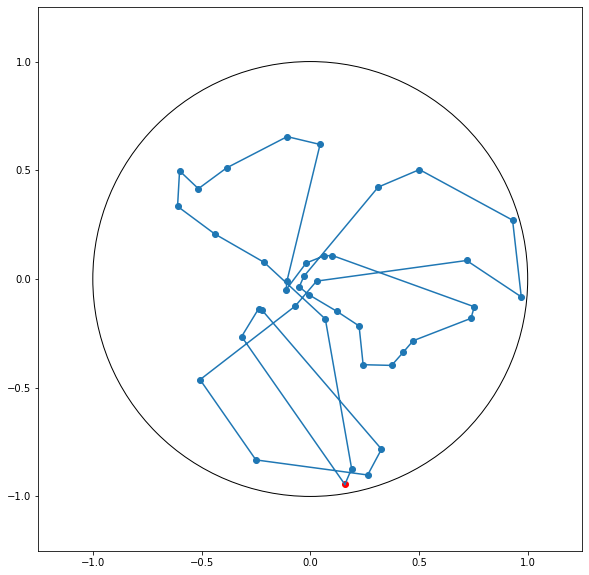

([0, 29, 14, 12, 28, 34, 23, 16, 31, 26, 13, 21, 38, 19, 32, 33, 1, 5, 9, 7, 39, 4, 8, 37, 24, 2, 30, 36, 22, 17, 35, 20, 40, 6, 25, 18, 11, 3, 10, 27, 15, 0], 11.620721876958177)
Genetic Algorithm:


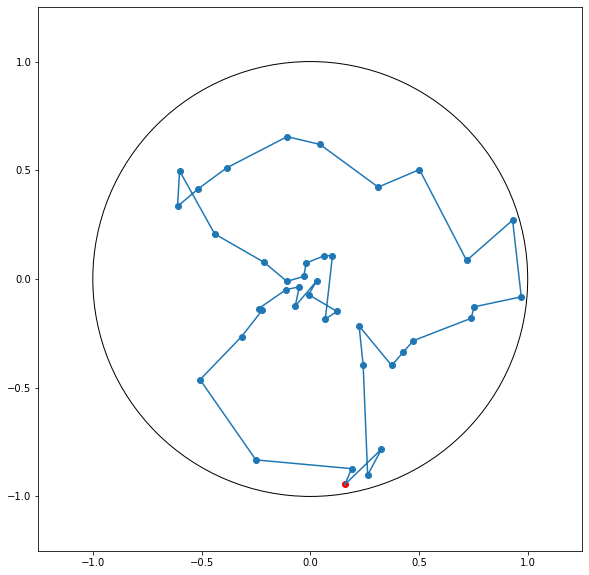

([0, 15, 23, 16, 29, 12, 14, 17, 1, 31, 26, 5, 9, 27, 30, 36, 22, 33, 35, 10, 3, 18, 11, 25, 6, 40, 20, 32, 19, 13, 38, 21, 2, 24, 37, 8, 4, 7, 39, 34, 28, 0], 8.022747478606313)


In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)

def generatePoints(N,draw=False):
  p = [0]*(N+1)
  for i in range(N+1):
    a = np.random.rand()*2*np.pi
    r = np.random.rand()
    p[i] = (r*np.cos(a), r*np.sin(a))
  #Distances
  d = [[((p[i][0]-p[j][0])**2 + (p[i][1]-p[j][1])**2)**(1/2)
       for i in range(N+1)] for j in range(N+1)]
  if(draw):
    drawRoute(p)
  return (p,d)

def drawRoute(p,r=None):
  plt.scatter(*zip(*p[1:]))
  plt.scatter(p[0][0],p[0][1],c="red")

  if(r != None):
    plt.plot(*zip(*[p[i] for i in r]))

  draw_circle = plt.Circle((0, 0), 1, fill=False)
  plt.gcf().gca().add_artist(draw_circle)

  plt.gca().set_aspect('equal')
  plt.xlim(-1.25, 1.25)
  plt.ylim(-1.25, 1.25)

  plt.show()

def totalCost(r, d):
  cost = 0
  for i in range(1,len(r)):
    cost = cost + d[r[i]][r[i-1]]
  return cost

def hillClimbing(p,d,n_iterations,draw=False):
  N = len(p)-1
  #Candidate
  c = [0] + np.random.choice(range(1,N+1), N, replace=False).tolist() + [0]
  cost = totalCost(c, d)
  for n in range(n_iterations):
    min = (0,0,0)
    for i in range(1,N):
      for j in range(i+1,N+1):
        if(i+1 == j):
          delta = d[c[i-1]][c[j]] + d[c[i]][c[j+1]] - d[c[i-1]][c[i]] - d[c[j+1]][c[j]]
        else:
          delta = d[c[i]][c[j-1]] + d[c[i]][c[j+1]] + d[c[i+1]][c[j]] +\
                  d[c[i-1]][c[j]] - d[c[i]][c[i-1]] - d[c[i]][c[i+1]] -\
                  d[c[j+1]][c[j]] - d[c[j-1]][c[j]]
        if(delta < min[0]):
          min = (delta,i,j)
    if(min[0] == 0):
      return (c,cost)
    c[min[1]], c[min[2]] = c[min[2]], c[min[1]]
    cost = cost + min[0]
  if(draw):
    drawRoute(p,c)
  return (c,cost)

def randomRestartHillClimbing(p,d,n_iterations,draw=False):
  min = hillClimbing(p,d,len(p))
  for n in range(n_iterations):
    aux = hillClimbing(p,d,len(p))
    if(aux[1] < min[1]):
      min = aux
  if(draw):
    drawRoute(p,min[0])
  return min

def simulatedAnnealing(p,d,n_iterations,draw=False):
  N = len(p) - 1
  #Candidate
  c = [0] + np.random.choice(range(1,N+1), N, replace=False).tolist() + [0]
  cost = totalCost(c, d)
  for n in range(1,n_iterations):
    i = np.random.randint(1,N+1)
    j = np.random.randint(1,N+1)
    if(i+1 == j):
      delta = d[c[i-1]][c[j]] + d[c[i]][c[j+1]] - d[c[i-1]][c[i]] - d[c[j+1]][c[j]]
    elif(i == j+1):
      delta = d[c[j-1]][c[i]] + d[c[j]][c[i+1]] - d[c[j-1]][c[j]] - d[c[i+1]][c[i]]
    else:
      delta = d[c[i]][c[j-1]] + d[c[i]][c[j+1]] + d[c[i+1]][c[j]] +\
              d[c[i-1]][c[j]] - d[c[i]][c[i-1]] - d[c[i]][c[i+1]] -\
              d[c[j+1]][c[j]] - d[c[j-1]][c[j]]
    if(np.random.rand() < np.e**(-(delta)*n)):
      c[i], c[j] = c[j], c[i]
      cost = cost + delta
  if(draw):
    drawRoute(p,c)
  return (c,cost)

def geneticAlgorithm(p,d,n_individuals,n_generations,prob_mutation,draw=False):
  N = len(p) - 1

  def newIndividual(r):
    p = [None,None,None]
    p[1] = r
    p[0] = totalCost(p[1], d)
    p[2] = [None]*(N+1)
    for i in range(N+1):
      p[2][r[i]] = i
    return p

  def reproduce(p1,p2):
    c1 = [True] + [False]*N #Checked
    c2 = [True] + [False]*N #Checked
    son1 = [0] + [None]*N + [0]
    son2 = [0] + [None]*N + [0]

    aux = 0
    for i in range(1,N+1):
      while(c1[aux]):
        if(i%2 == 0):
          aux = p1[1][(p1[2][aux]+1)%(N+1)]
        else:
          aux = p2[1][(p2[2][aux]+1)%(N+1)]
      c1[aux] = True
      son1[i] = aux

    aux = 0
    for i in range(1,N+1):
      while(c2[aux]):
        if(i%2 != 0):
          aux = p1[1][(p1[2][aux]+1)%(N+1)]
        else:
          aux = p2[1][(p2[2][aux]+1)%(N+1)]
      c2[aux] = True
      son2[i] = aux

    individuals = sorted([p1,p2,newIndividual(son1),newIndividual(son2)],key=lambda x:x[0])

    return (individuals[0], individuals[1])

  def mutation(r):
    i = np.random.randint(1,N)
    j = np.random.randint(1,N)
    r[i], r[j] = r[j], r[i]
    return newIndividual(r)

  population = [newIndividual([0] + np.random.choice(range(1,N+1), N, replace=False).tolist() + [0]) for i in range(2*n_individuals)]
  population = sorted(population,key=lambda x:x[0])
  for n in range(n_generations):
    newPopulation = [None]*len(population)
    for i in range(n_individuals):
      (son1, son2) = reproduce(population[i],population[n_individuals+i])
      if(np.random.rand() < prob_mutation):
        son1 = mutation(son1[1])
      if(np.random.rand() < prob_mutation):
        son2 = mutation(son2[1])
      newPopulation[2*i] = son1
      newPopulation[2*i+1] = son2
    population = sorted(newPopulation,key=lambda x:x[0])
  if(draw):
    drawRoute(p,population[0][1])
  return (population[0][1],population[0][0])

N = 40
(p,d) = generatePoints(N,True)
print("Random Restart Hill Climbing:")
print(randomRestartHillClimbing(p,d,N,True))
print("Simulated Annealing:")
print(simulatedAnnealing(p,d,N**3,True))
print("Genetic Algorithm:")
print(geneticAlgorithm(p,d,N,N**2,0.1,True))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:85: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: overflow encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: RuntimeWarning: overflow encountered in double_scalars


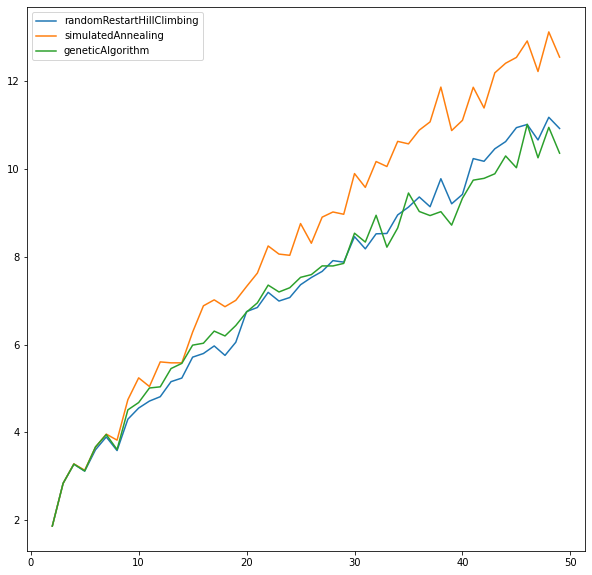

In [ ]:
y = range(2,50) #point range
x = 10 #iterations

rrhc = []
sa = []
ga = []

for n in y:
  sumrrhc = 0
  sumsa = 0
  sumga = 0
  for i in range(x):
    (p,d) = generatePoints(n)
    sumrrhc += randomRestartHillClimbing(p,d,n)[1]
    sumsa += simulatedAnnealing(p,d,n**3)[1]
    sumga += geneticAlgorithm(p,d,n,n**2,0.1)[1]
  rrhc.append(sumrrhc/x)
  sa.append(sumsa/x)
  ga.append(sumga/x)

plt.plot(y, rrhc, label = "randomRestartHillClimbing")
plt.plot(y, sa, label = "simulatedAnnealing")
plt.plot(y, ga, label = "geneticAlgorithm")
plt.legend()
plt.show()

Output()

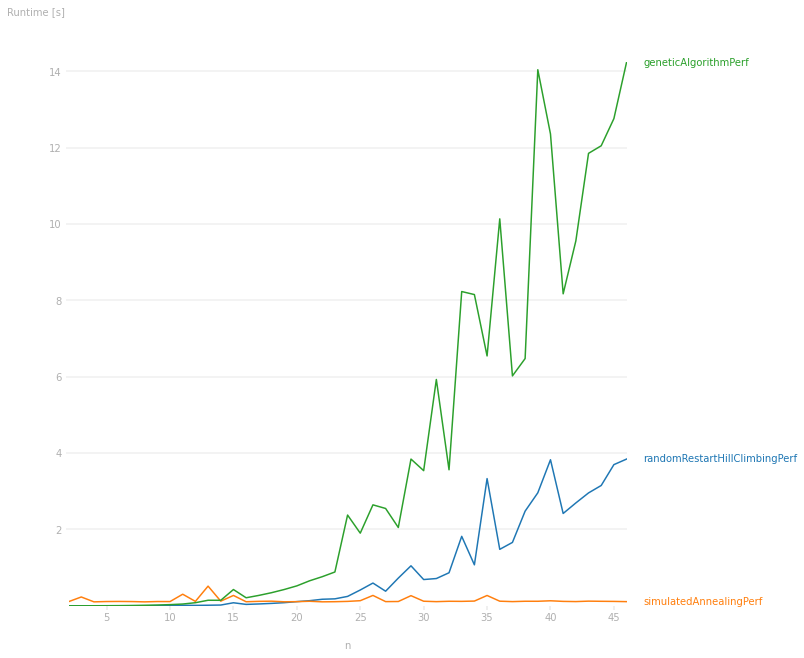

In [ ]:
import perfplot

def randomRestartHillClimbingPerf(n):
    (p,d) = generatePoints(n)
    return randomRestartHillClimbing(p,d,n)

def simulatedAnnealingPerf(n):
    (p,d) = generatePoints(n)
    return simulatedAnnealing(p,d,n**3)

def geneticAlgorithmPerf(n):
    (p,d) = generatePoints(n)
    return geneticAlgorithm(p,d,n,n**2,0.1)

perfplot.show(
    setup=lambda n: n,
    n_range=range(2,100),
    kernels=[
        randomRestartHillClimbingPerf,
        simulatedAnnealingPerf,
        geneticAlgorithmPerf
    ],
    xlabel="n",
    equality_check=None
)

Simulated Annealing converge rápidamente hacia una respuesta aproximada, pero da respuestas menos óptimas cuando el problema es grande, incluso si se aumenta considerablemente el número de iteraciones. Random Restart Hill garantiza una respuesta muy cercana a la óptima con una cantidad de iteraciones suficientemente alta, pero aumenta rápidamente su costo computacional. El algoritmo genético es el más costoso computacionalmente pero da respuestas más óptimas para entradas grandes.

Una fórmula aproximada para la distancia mínima con los datos obtenidos sería f(n)=n^(0.6).

# 2. Quadratic Assignment Problem

## Preprocessing data

In [ ]:
with open('nug25.dat') as f:
    text = f.readlines()

string = str(text)
string = string.replace("\\n","")
string = string.replace("3744","")
string = string.replace("  25","")
string = string.replace("'', '', '', ","")
string = string.replace(" '', ","")
string = string.replace(", ''","")
string = string.replace("[","")
string = string.replace("]","")
string = string.replace("'","")
string = string.replace(",","")

temp = string.split()
final = []

cont = 0
auxl = []
for elem in temp:
    if cont%25==0:
        final.append(auxl)
        auxl = []
    if not elem.isspace():
        cont+=1
        aux = int(elem)
        auxl.append(aux)
        
final.remove([])
final.append([0,10,0,5,2,1,0,5,5,2,5,5,1,5,5,10,5,0,2,2,1,0,0,2,0])

distances = final[:26]
flows = final[25:]




## QAP by genetic algorithm

In [ ]:
def QAP(size, population, distances, flows, generations):
    #Initial population 250
    population = initialPopulation(25,250)
    
    solution = 5000 
    next_generation = []
    
    for i in range(generations):
        population = cost(distances,flows,population)
        population.sort(key = lambda x: x[1])
        best_sol = list.copy(population[0]) # best solution at i iteration
        
        if best_sol[1] < solution:
            result = list.copy(best_sol)
            solution = result[1]
        
        #print("For the "+str(i)+" generation"+" the best solution is "+ str(solution))
            
        while len(next_generation) < len(population):
            
            p1 = parentSelection(population)
            p2 = parentSelection(population)
            
            child1,child2 = crossover(p1,p2)
            
            dice = random.choice([1,2])
            
            if dice%2==0:
                child1 = mutation(child1)
                child2 = mutation(child2)
                
            next_generation.append(child1)
            next_generation.append(child2)
            
        population = next_generation
        next_generation = []

    print("\n\nThe final result after",(generations),"generations is: ")
    print(result[0])
    print("With a cost func",result[1])
        
    return result

#---------------------------------------------------------------------------------------------------------------------------
def initialPopulation(problem_size, population_size):
    population = []
    
    for i in range(population_size):
        sol = random.sample(range(problem_size),problem_size)
        population.append([sol,0])
    return population

#---------------------------------------------------------------------------------------------------------------------------
def parentSelection(population):
    
    dice = [i+1 for i in range(6)]
    roll = random.choice(dice)
    if roll%2 == 0:
       # best_list = population.sort(key = lambda x: x[1]) #sort by cost
        best_list = sorted(population, key=itemgetter(1))
        return best_list[0]
    else:
        random_list = random.sample(population, int(len(population)/25))
        random_list.sort(key = lambda x: x[1])
        return random_list[0]

#---------------------------------------------------------------------------------------------------------------------------
def cost(distances,flows,population):
    #each solution of the population with his cost
    for solution in population:
        cost = 0
        visited_solutions = []
        
        for i in solution[0]:
            for j in solution[0]:
                #if (i,j) in visited_solutions or (j,i) in visited_solutions:
                    #continue
                
                cost += flows[solution[0][i]][solution[0][j]] * distances[i][j]
                visited_solutions.append((i,j))
                
        solution[1] = cost
    return population

#---------------------------------------------------------------------------------------------------------------------------


def crossover(p1,p2):
    coin = random.choice([1,2])
    indexes = [i for i in range(25)]
    locations_ch1 = [i for i in range(25)]
    locations_ch2 = [i for i in range(25)]
    child1 = [[0]*25,0]
    child2 = [[0]*25,0]
    
    k = random.randint(0,25) #choose k numbers
    randomIndexes = []
        
    for i in range(k):
        aux = random.choice(indexes)
        indexes.remove(aux)
        randomIndexes.append(aux)
            
    for j in range(k):
        child1[0][randomIndexes[j]] = (p1[0][randomIndexes[j]])
        child2[0][randomIndexes[j]] = (p2[0][randomIndexes[j]])
        
        locations_ch1.remove(p1[0][randomIndexes[j]])
        locations_ch2.remove(p2[0][randomIndexes[j]])
            
    for h in range(25):
        if h not in randomIndexes:
            r1 = random.choice(locations_ch1)
            child1[0][h] = r1
            locations_ch1.remove(r1)
                
            r2 = random.choice(locations_ch2)
            child2[0][h] = r2
            locations_ch2.remove(r2)
    
    return child1,child2

#---------------------------------------------------------------------------------------------------------------------------

def mutation(solution):
    mutated_solu = solution[0]
    
    randomNum1 = random.randint(0, len(mutated_solu) - 1)
    randomNum2 = random.randint(0, len(mutated_solu) - 1)
    
    mutated_solu[randomNum1], mutated_solu[randomNum2] = mutated_solu[randomNum2], mutated_solu[randomNum1]
    
    return solution


In [ ]:
QAP(25, 400, distances, flows, 1000);



The final result after 1000generations is: 
[16, 11, 13, 22, 12, 23, 3, 20, 6, 9, 17, 2, 5, 15, 18, 1, 24, 7, 8, 0, 4, 10, 19, 14, 21]
With a cost func 3748
